In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [5]:
columns = ['Class','Alcohol','MalicAcid','Ash','Acl','Mg','Phenols','Flav','Non-Flav','Proanth','Color','Hue','OD','Proline']
df = pd.read_csv("wine.xls",names=columns)

In [6]:
df.head()

,Class,Alcohol,MalicAcid,Ash,Acl,Mg,Phenols,Flav,Non-Flav,Proanth,Color,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df.shape

(178, 14)

There are 178 rows and 14 columns in the given dataset. 'Class' is the target variable.

In [10]:
df['Class'].value_counts().sort_index()

1    59
2    71
3    48
Name: Class, dtype: int64

So, there are 59 responses as Class 1, 71 responses as Class 2 and 48 responses as Class 3.

In [14]:
df.isnull().any()

Class        False
Alcohol      False
MalicAcid    False
Ash          False
Acl          False
Mg           False
Phenols      False
Flav         False
Non-Flav     False
Proanth      False
Color        False
Hue          False
OD           False
Proline      False
dtype: bool

There are no missing values in the given dataset.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class        178 non-null int64
Alcohol      178 non-null float64
MalicAcid    178 non-null float64
Ash          178 non-null float64
Acl          178 non-null float64
Mg           178 non-null int64
Phenols      178 non-null float64
Flav         178 non-null float64
Non-Flav     178 non-null float64
Proanth      178 non-null float64
Color        178 non-null float64
Hue          178 non-null float64
OD           178 non-null float64
Proline      178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
MalicAcid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Acl,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Mg,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flav,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Non-Flav,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanth,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


### Outlier Detection:

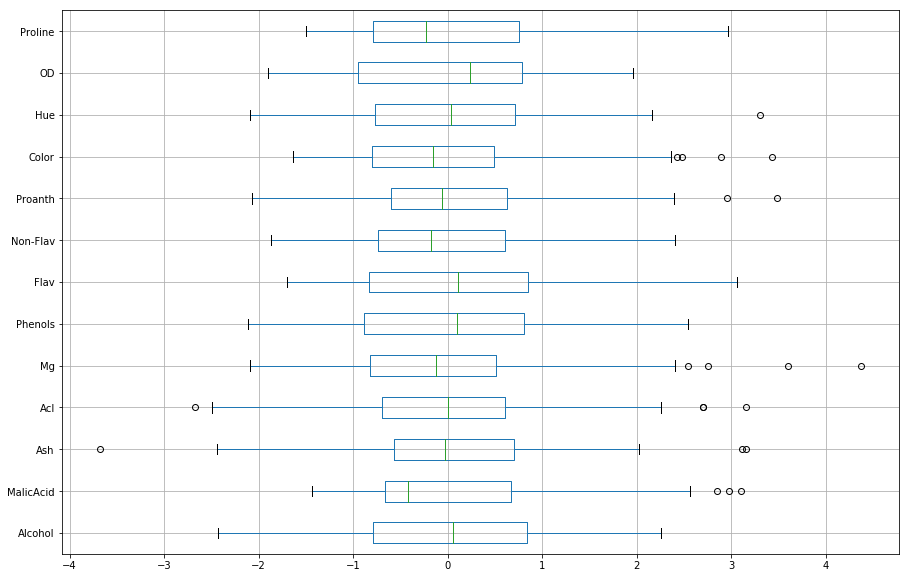

In [44]:
from sklearn.preprocessing import StandardScaler
x=df.drop(['Class'],axis=1)
scaler=StandardScaler().fit(x)
y=pd.DataFrame(scaler.transform(x),columns=x.columns)
y.boxplot(vert=False,figsize=(15,10))

SO, for MalicAcid,Ash,Acl,Mg,Proanth,Color and Hue are having outliers. Among them Color and Mg are having more outliers.

In [45]:
Q1 = df.Color.quantile(0.25)
Q3 = df.Color.quantile(0.75)
IQR = Q3 - Q1
print("IQR :",IQR)
print("Q1 :",Q1)
print("Q3 :",Q3)
LW = (Q1 - 1.5*IQR)
HW = (Q3 + 1.5*IQR)
print("LW :",LW, "\nHW :",HW)

IQR : 2.9800000000000004
Q1 : 3.2199999999999998
Q3 : 6.2
LW : -1.2500000000000009 
HW : 10.670000000000002


In [46]:
res = (df['Color'] < (Q1 - 1.5 * IQR)) | (df['Color'] > (Q3 + 1.5 * IQR))
df[res]

,Class,Alcohol,MalicAcid,Ash,Acl,Mg,Phenols,Flav,Non-Flav,Proanth,Color,Hue,OD,Proline
151,3,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
158,3,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
159,3,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
166,3,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695


The above four rows are the outliers in 'Color' feature.

In [47]:
Q1 = df.Mg.quantile(0.25)
Q3 = df.Mg.quantile(0.75)
IQR = Q3 - Q1
print("IQR :",IQR)
print("Q1 :",Q1)
print("Q3 :",Q3)
LW = (Q1 - 1.5*IQR)
HW = (Q3 + 1.5*IQR)
print("LW :",LW, "\nHW :",HW)

IQR : 19.0
Q1 : 88.0
Q3 : 107.0
LW : 59.5 
HW : 135.5


In [48]:
res = (df['Mg'] < (Q1 - 1.5 * IQR)) | (df['Mg'] > (Q3 + 1.5 * IQR))
df[res]

,Class,Alcohol,MalicAcid,Ash,Acl,Mg,Phenols,Flav,Non-Flav,Proanth,Color,Hue,OD,Proline
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,2,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
78,2,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937


The above four rows are the outliers in 'Mg' feature.

### Standardization:

In [128]:
x = df.drop(['Class'],axis=1)
y = df['Class']

In [133]:
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries

from sklearn import preprocessing
# Get column names first
names = x.columns
# Create the Scaler object
scaler = preprocessing.scale(x)
X = pd.DataFrame(scaler, columns=names)
Y = df['Class']

In [134]:
X.head()

,Alcohol,MalicAcid,Ash,Acl,Mg,Phenols,Flav,Non-Flav,Proanth,Color,Hue,OD,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### PCA Application:

In [135]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents,columns = ['Comp1','Comp2','Comp3','Comp4','Comp5','Comp6','Comp7','Comp8','Comp9','Comp10','Comp11','Comp12','Comp13'])

In [136]:
principalDf.head()

,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8,Comp9,Comp10,Comp11,Comp12,Comp13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


In [159]:
principalDf['Comp1'].var()

4.7324369775835855

In [160]:
(principalDf['Comp1'].var())/(pca.explained_variance_.sum())

0.36198848099926323

In [137]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


In [138]:
n_comp = np.arange(1,14)
ex_var_ratio = pca.explained_variance_ratio_
df1 = pd.DataFrame({'n_comp': list(n_comp), 'ex_var_ratio': ex_var_ratio},columns=['n_comp','ex_var_ratio'])
df1.head()                

,n_comp,ex_var_ratio
0,1,0.361988
1,2,0.192075
2,3,0.111236
3,4,0.070690
4,5,0.065633


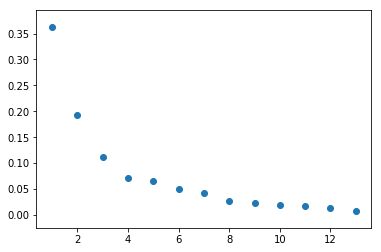

In [139]:
plt.scatter( x = "n_comp",y = "ex_var_ratio",data=df1)

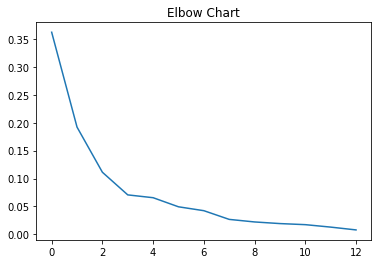

In [140]:
plt.plot(ex_var_ratio)
plt.title('Elbow Chart')
plt.show()

### Logistic Regression

#### Without PCA:

In [157]:
x = df.drop(['Class'],axis=1)
y = df['Class']

In [158]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3,shuffle=True,random_state=2)
acc=[]
for train,test in kf.split(x,y):
    M=LogisticRegression()
    xtrain,xtest=x.iloc[train,:],x.iloc[test,:]
    ytrain,ytest=y[train],y[test]
    M.fit(xtrain,ytrain)
    y_predict=M.predict(xtest)
    acc.append(metrics.accuracy_score(ytest,y_predict))
    print(metrics.confusion_matrix(ytest,y_predict))
    print(metrics.classification_report(ytest,y_predict))
print("Cross-validated Score:%.2f%% " % np.mean(acc))  

[[19  2  0]
 [ 0 22  0]
 [ 0  1 16]]
             precision    recall  f1-score   support

          1       1.00      0.90      0.95        21
          2       0.88      1.00      0.94        22
          3       1.00      0.94      0.97        17

avg / total       0.96      0.95      0.95        60

[[15  0  0]
 [ 2 22  1]
 [ 0  1 18]]
             precision    recall  f1-score   support

          1       0.88      1.00      0.94        15
          2       0.96      0.88      0.92        25
          3       0.95      0.95      0.95        19

avg / total       0.93      0.93      0.93        59

[[22  1  0]
 [ 0 23  1]
 [ 0  0 12]]
             precision    recall  f1-score   support

          1       1.00      0.96      0.98        23
          2       0.96      0.96      0.96        24
          3       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        59

Cross-validated Score:0.95% 


#### With PCA:

In [142]:
X1 = principalDf
Y1 = df['Class']

In [153]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3,shuffle=True,random_state=2)
acc1=[]
for train,test in kf.split(X1,Y1):
    M=LogisticRegression()
    X1train,X1test=X1.iloc[train,:],X1.iloc[test,:]
    Y1train,Y1test=Y1[train],Y1[test]
    M.fit(X1train,Y1train)
    Y1_predict=M.predict(X1test)
    acc1.append(metrics.accuracy_score(Y1test,Y1_predict))
    print(metrics.confusion_matrix(Y1test,Y1_predict))
    print(metrics.classification_report(Y1test,Y1_predict))
print("Cross-validated Score:%.2f%% " % np.mean(acc1))  

[[21  0  0]
 [ 0 22  0]
 [ 0  0 17]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        21
          2       1.00      1.00      1.00        22
          3       1.00      1.00      1.00        17

avg / total       1.00      1.00      1.00        60

[[15  0  0]
 [ 1 23  1]
 [ 0  0 19]]
             precision    recall  f1-score   support

          1       0.94      1.00      0.97        15
          2       1.00      0.92      0.96        25
          3       0.95      1.00      0.97        19

avg / total       0.97      0.97      0.97        59

[[23  0  0]
 [ 1 22  1]
 [ 0  0 12]]
             precision    recall  f1-score   support

          1       0.96      1.00      0.98        23
          2       1.00      0.92      0.96        24
          3       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        59

Cross-validated Score:0.98% 


### Logistic Regression with PCA(5 Components)

In [161]:
pca5 = PCA(n_components=5)
principalComponents = pca5.fit_transform(X)
principalDf5 = pd.DataFrame(data = principalComponents,columns = ['Comp1','Comp2','Comp3','Comp4','Comp5'])

In [164]:
print(pca5.explained_variance_)
print(pca5.explained_variance_ratio_)
print(pca5.explained_variance_ratio_.cumsum())

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868]
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294]
[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293]


In [162]:
X2 = principalDf5
Y2 = df['Class']

In [163]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3,shuffle=True,random_state=2)
acc=[]
for train,test in kf.split(X2,Y2):
    M=LogisticRegression()
    X2train,X2test=X2.iloc[train,:],X2.iloc[test,:]
    Y2train,Y2test=Y2[train],Y2[test]
    M.fit(X2train,Y2train)
    Y2_predict=M.predict(X2test)
    acc.append(metrics.accuracy_score(Y2test,Y2_predict))
    print(metrics.confusion_matrix(Y2test,Y2_predict))
    print(metrics.classification_report(Y2test,Y2_predict))
print("Cross-validated Score:%.2f%% " % np.mean(acc))  

[[21  0  0]
 [ 0 22  0]
 [ 0  0 17]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        21
          2       1.00      1.00      1.00        22
          3       1.00      1.00      1.00        17

avg / total       1.00      1.00      1.00        60

[[15  0  0]
 [ 1 23  1]
 [ 0  0 19]]
             precision    recall  f1-score   support

          1       0.94      1.00      0.97        15
          2       1.00      0.92      0.96        25
          3       0.95      1.00      0.97        19

avg / total       0.97      0.97      0.97        59

[[23  0  0]
 [ 2 21  1]
 [ 0  0 12]]
             precision    recall  f1-score   support

          1       0.92      1.00      0.96        23
          2       1.00      0.88      0.93        24
          3       0.92      1.00      0.96        12

avg / total       0.95      0.95      0.95        59

Cross-validated Score:0.97% 


### Logistic Regression with PCA(8 Components)

In [154]:
pca8 = PCA(n_components=8)
principalComponents = pca8.fit_transform(X)
principalDf8 = pd.DataFrame(data = principalComponents,columns = ['Comp1','Comp2','Comp3','Comp4','Comp5','Comp6','Comp7','Comp8'])

In [165]:
print(pca8.explained_variance_)
print(pca8.explained_variance_ratio_)
print(pca8.explained_variance_ratio_.cumsum())

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627]
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749]
[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544]


In [155]:
X3 = principalDf8
Y3 = df['Class']

In [156]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3,shuffle=True,random_state=2)
acc=[]
for train,test in kf.split(X3,Y3):
    M=LogisticRegression()
    X3train,X3test=X3.iloc[train,:],X3.iloc[test,:]
    Y3train,Y3test=Y3[train],Y3[test]
    M.fit(X3train,Y3train)
    Y3_predict=M.predict(X3test)
    acc.append(metrics.accuracy_score(Y3test,Y3_predict))
    print(metrics.confusion_matrix(Y3test,Y3_predict))
    print(metrics.classification_report(Y3test,Y3_predict))
print("Cross-validated Score:%.2f%% " % np.mean(acc))  

[[21  0  0]
 [ 0 22  0]
 [ 0  0 17]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        21
          2       1.00      1.00      1.00        22
          3       1.00      1.00      1.00        17

avg / total       1.00      1.00      1.00        60

[[15  0  0]
 [ 1 23  1]
 [ 0  0 19]]
             precision    recall  f1-score   support

          1       0.94      1.00      0.97        15
          2       1.00      0.92      0.96        25
          3       0.95      1.00      0.97        19

avg / total       0.97      0.97      0.97        59

[[23  0  0]
 [ 1 22  1]
 [ 0  0 12]]
             precision    recall  f1-score   support

          1       0.96      1.00      0.98        23
          2       1.00      0.92      0.96        24
          3       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        59

Cross-validated Score:0.98% 


#### Accuracy for Logistic Regression without PCA is 95% and with PCA is 98%.